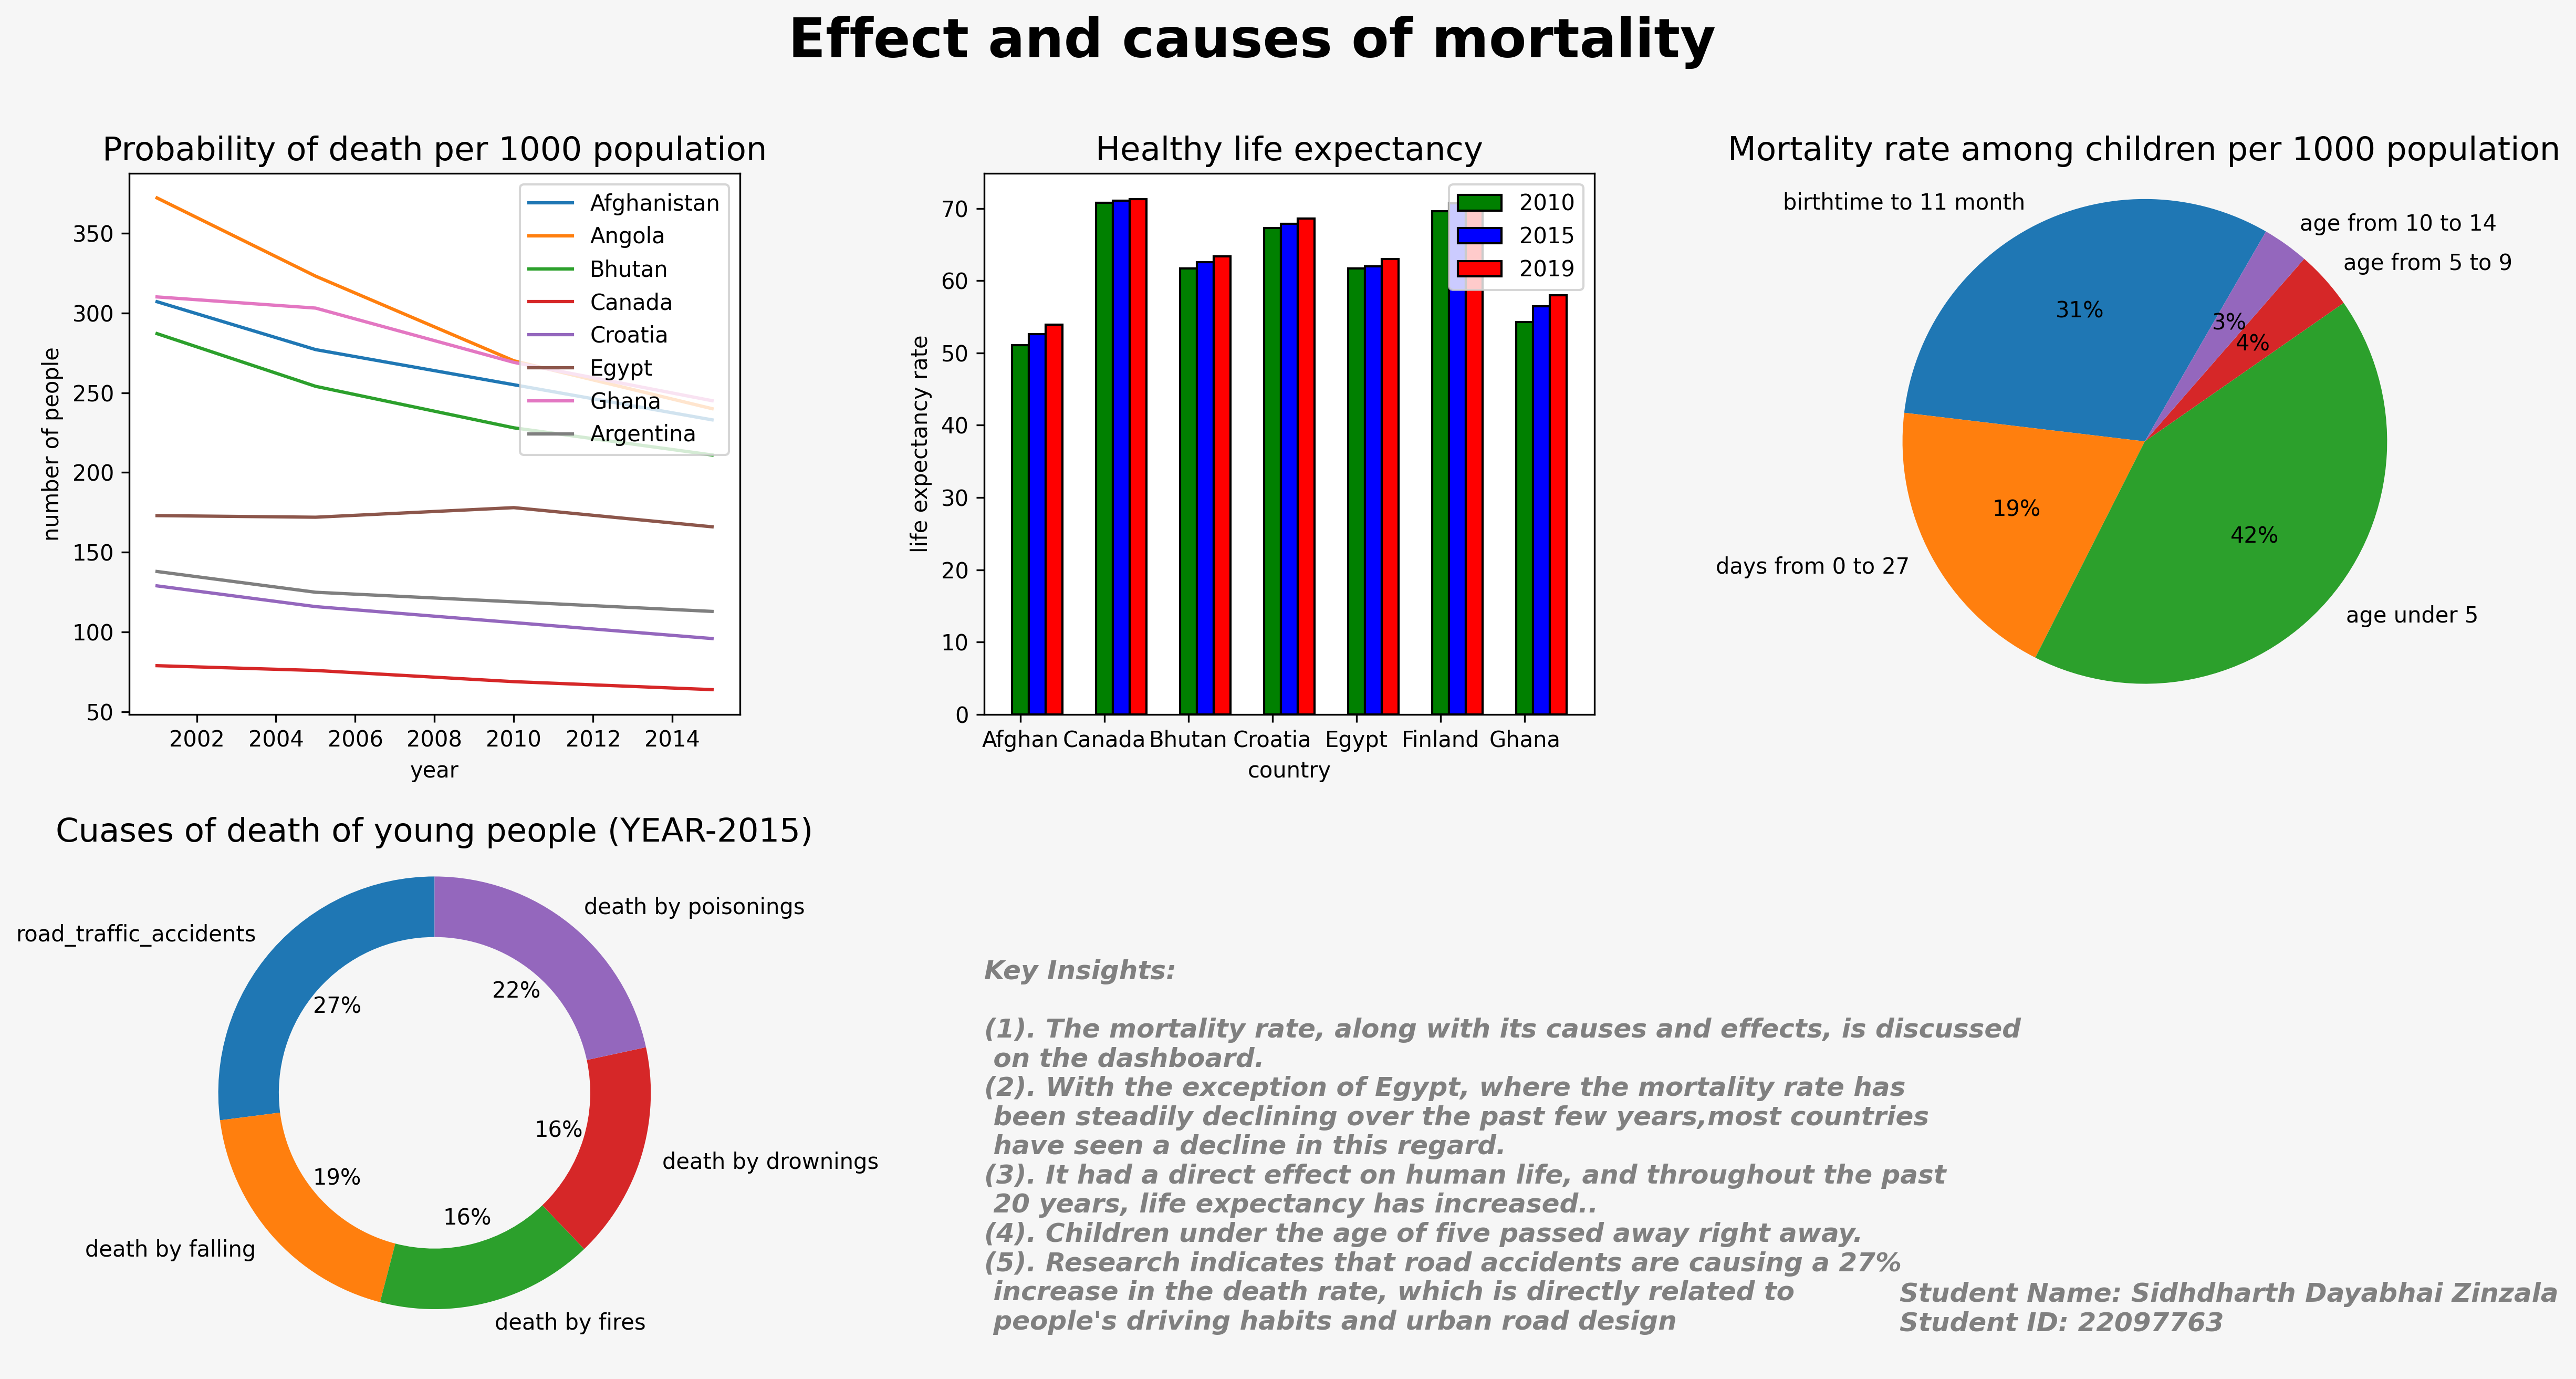

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Tue Jan  9 18:55:52 2024

@author: Lenovo
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec


def line_graph(grid):
    """


    Parameters
    ----------
    grid : TYPE
        DESCRIPTION.

    Returns
    -------
    None.

    """
    # grid plotting
    fig = plt.subplot(grid[0, 0])

    df = pd.read_csv("adult_mortality.csv", skiprows=1)
    countries = df["Countries, territories and areas"].unique()
    column_name = df["Year"].unique()

    new_df = pd.DataFrame(columns=column_name, index=countries)

    for index, row in df.iterrows():
        new_df.loc[row['Countries, territories and areas'],
                   row['Year']] = row[' Both sexes']

    countries = ["Afghanistan", "Angola", "Canada", "Bhutan", "Croatia",
                 "Egypt", "Ghana", "Argentina"]
    years = [2001, 2005, 2010, 2015]
    new_df = new_df.loc[countries, years]
    new_df = new_df.T
    new_df.index = new_df.index.astype(int)

    plt.plot(years, new_df['Afghanistan'], label="Afghanistan")
    plt.plot(years, new_df["Angola"], label="Angola")
    plt.plot(years, new_df['Bhutan'], label="Bhutan")
    plt.plot(years, new_df["Canada"], label="Canada")
    plt.plot(years, new_df["Croatia"], label="Croatia")
    plt.plot(years, new_df["Egypt"], label="Egypt")
    plt.plot(years, new_df["Ghana"], label="Ghana")
    plt.plot(years, new_df["Argentina"], label="Argentina")

    # add X-axis label
    plt.xlabel("year")
    # add Y-axis label
    plt.ylabel("number of people")  # add Y-axis label
    # add title
    plt.title("Probability of death per 1000 population", fontsize=15, y=1)

    plt.legend()


def bar_graph(grid):
    """


    Parameters
    ----------
    grid : TYPE
        DESCRIPTION.

    Returns
    -------
    None.

    """
    # grid plotting
    plt.subplot(grid[0, 1])

    df = pd.read_csv("life_expectancy.csv", skiprows=2)

    countries_df = df["Countries, territories and areas"].unique()
    df.index = countries_df
    df = df.iloc[:, [4, 3, 2, 1]]
    countries = ["Afghanistan", "Canada", "Bhutan",
                 "Croatia", "Egypt", "Finland", "Ghana"]
    df = df.loc[countries]

    number = 7
    outout = np.arange(number)
    width = 0.20

    plt.bar(outout, df.iloc[:, 1],
            width=width, color='g',
            label='Clean energy', edgecolor='black')
    plt.bar(outout+width, df.iloc[:, 2],
            width=width, color='b',
            label='Clean energy', edgecolor='black')
    plt.bar(outout+width+width, df.iloc[:, 3],
            width=width, color='r',
            label='Clean energy', edgecolor='black')

    x = [0, 1, 2, 3, 4, 5, 6]
    labels = ["Afghan", "Canada", "Bhutan",
              "Croatia", "Egypt", "Finland", "Ghana"]
    plt.xticks(x, labels)
    plt.legend([2010, 2015, 2019], loc="upper right")

    # add X-axis label
    plt.xlabel("country")
    # add Y-axis label
    plt.ylabel("life expectancy rate")  # add Y-axis label
    # add title
    plt.title("Healthy life expectancy", fontsize=15)


def first_pie_graph(grid):
    """


    Parameters
    ----------
    grid : TYPE
        DESCRIPTION.

    Returns
    -------
    None.

    """
    # grid plotting
    plt.subplot(grid[0, 2])

    def pie_func(file, rows):
        df1 = pd.read_csv(file, skiprows=1)
        value = (df1.iloc[1, 2]).split(" ")
        temp_val = float(value[0])
        new_df.loc[rows, "2020"] = temp_val

    rows = ["birthtime to 11 month", "days from 0 to 27", "age under 5",
            "age from 5 to 9", "age from 10 to 14"]
    new_df = pd.DataFrame(columns=["2020"], index=rows)

    # Function calling to fill dataframe----------------------------
    file = [
        "birth_to_11_months_pie.csv",
        "days_0_to_27_pie.csv",
        "age_under_5_pie.csv",
        "age_5_to_9_pie.csv",
        "age_10_to_14_pie.csv",
    ]
    for (x, y) in zip(file, rows):
        pie_func(x, y)

    plt.pie(new_df.loc[rows, "2020"], labels=rows, autopct='%.0f%%',
            startangle=60)

    plt.title("Mortality rate among children per 1000 population", fontsize=15)

    # Equal aspect ratio ensures that pie is drawn as circle.
    plt.axis('equal')


def second_pie_graph(grid):
    """


    Parameters
    ----------
    grid : TYPE
        DESCRIPTION.

    Returns
    -------
    None.

    """
    # grid plotting
    plt.subplot(grid[1, 0])
    pie_list = []

    def fourth_pie(file):
        df = pd.read_csv(file, skiprows=6)
        df = df.loc[(df["Sex"] == "All") &
                    (df["Age group code"] == "Age35_39")][["Number"]]
        pie_list.append(df.iloc[0, 0])

    file = ["road_traffic.csv", "falls.csv", "fires.csv", "drownings.csv",
            "poisonings.csv"]
    lab = ["road_traffic_accidents", "death by falling", "death by fires",
           "death by drownings", "death by poisonings"]

    for x in file:
        fourth_pie(x)

    # Plotting data on chart
    plt.pie(pie_list, labels=lab, autopct='%.0f%%', startangle=90,
            wedgeprops=dict(width=0.28))  # Adjust fontsize here
    plt.title("Cuases of death of young people (YEAR-2015)",
              y=0.94, fontsize=15)


def plot_text(grid):
    """


    Parameters
    ----------
    grid : TYPE
        DESCRIPTION.

    Returns
    -------
    None.

    """

    # Add a subplot for key insights
    # grid plotting
    plt.subplot(grid[1, 1])
    text = "Key Insights:\n\n" \
           "(1). The mortality rate, along with its causes and effects, is "\
           +"discussed \n on the dashboard.\n"\
           "(2). With the exception of Egypt, where the mortality "\
           +"rate has \n been steadily declining over the past few years,"\
           +"most countries \n have seen a decline in this regard.\n" \
           "(3). It had a direct effect on human life, and throughout the "\
           +"past \n 20 years, life expectancy has increased..\n" \
           "(4). Children under the age of five passed away right away. \n" \
           "(5). Research indicates that road accidents are causing "\
           +"a 27%\n increase in the death rate, which is directly "\
           +"related to\n people's driving habits and urban road design"
    plt.text(0, 0.4, text, ha='left', va='center', fontsize=12,
             color='gray', fontstyle='italic', fontweight='bold')
    plt.axis('off')

    # Add student information
    plt.subplot(grid[1, 2])
    text = "Student Name: Sidhdharth Dayabhai Zinzala\n" \
           "Student ID: 22097763                       "
    plt.text(0.1, 0.1, text, ha='left', va='center', fontsize=12,
             color='gray',
             fontstyle='italic', fontweight='bold')
    plt.axis('off')

    # Main title for the entire dashboard
    fig.suptitle('Effect and causes of mortality', fontsize=25,
                 fontweight='bold')


# main functon ---------------------------------------------------------------

# sns.set_theme()
fig = plt.figure(figsize=(19, 10), dpi=300)
fig.patch.set_facecolor("#f6f6f6")
grid = GridSpec(2, 3, width_ratios=[1, 1, 1], height_ratios=[1, 1], wspace=0.4)

line_graph(grid)
bar_graph(grid)
first_pie_graph(grid)
second_pie_graph(grid)
plot_text(grid)
#plt.savefig("22097763.png", dpi=300, bbox_inches='tight')
plt.show()